In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# The main purpose of this project is to answer a few questions:
# 1. Which company has most complaints?
# 2. What's the main reason for complaints for each company?
# 3. How companies react to complaints? Are consumers satisfied with the response?
# 4. Are there any patterns for the time complaints happened?

complaint = pd.read_csv('/Users/luke.xu/Desktop/dat project dataset/complaints.csv')

/var/folders/h8/zy5q95td7t11cvkwz9yd5dph0000gn/T/ipykernel_85668/346455772.py:7: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  complaint = pd.read_csv('/Users/luke.xu/Desktop/dat project dataset/complaints.csv')


In [3]:
# First, let's have a brief look at the dataset.
complaint.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2022-07-19,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",OH,44484.0,Servicemember,NaN,Web,2022-07-19,In progress,Yes,NaN,5784967
1,2022-07-13,Credit card or prepaid card,General-purpose credit card or charge card,Fees or interest,Problem with fees,NaN,NaN,CAPITAL ONE FINANCIAL CORPORATION,IN,47905.0,NaN,NaN,Web,2022-07-13,Closed with monetary relief,Yes,NaN,5763243
2,2022-07-12,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,33837.0,NaN,NaN,Web,2022-07-12,In progress,Yes,NaN,5764173
3,2022-07-14,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,NaN,"EQUIFAX, INC.",AZ,86515.0,NaN,NaN,Web,2022-07-14,In progress,Yes,NaN,5770118
4,2022-04-17,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,DE,19702.0,NaN,Consent not provided,Web,2022-04-17,Closed with non-monetary relief,Yes,NaN,5457569


In [4]:
# There are 6445 unique companies in the dataset.
complaint['Company'].unique().shape

(6445,)

{'whiskers': [<matplotlib.lines.Line2D at 0x120a71e80>,
 'caps': [<matplotlib.lines.Line2D at 0x120a8d520>,
 'boxes': [<matplotlib.lines.Line2D at 0x120a71bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x120a8da00>],
 'fliers': [<matplotlib.lines.Line2D at 0x120a8dcd0>],
 'means': []}

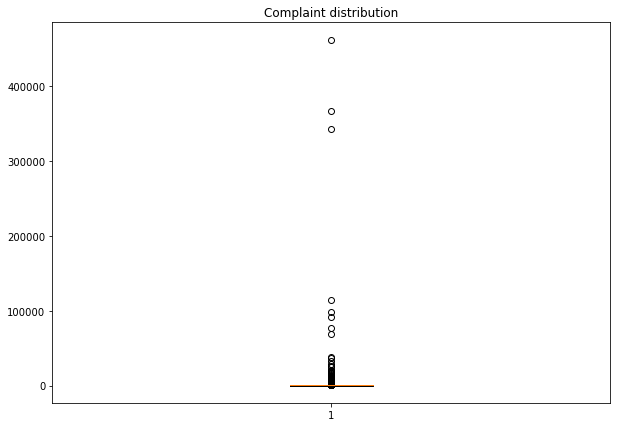

In [5]:
# As indicated by the boxplot, the number of complaints for each company is distributed very unevenly. Most companies
# have few complaints, leading to a very low median. However, outliers exist, with few companies' complaints numbers
# far exceed other companies.
fig, ax = plt.subplots(figsize = (10,7))
ax.set_title('Complaint distribution')
ax.boxplot(complaint['Company'].value_counts())

In [6]:
# EQUIFAX INC has the most complaints.
complaint['Company'].value_counts()

EQUIFAX, INC.                             462243
TRANSUNION INTERMEDIATE HOLDINGS, INC.    366616
Experian Information Solutions Inc.       342772
BANK OF AMERICA, NATIONAL ASSOCIATION     114846
WELLS FARGO & COMPANY                      97879
                                           ...  
Fuel Capital Group                             1
Perennial Funding LLC                          1
Samsa Technologies Inc                         1
Merchants Acquisition Group LLC                1
BAY VALLEY                                     1
Name: Company, Length: 6445, dtype: int64

<AxesSubplot:title={'center':'Change in complaint number'}, xlabel='Year'>

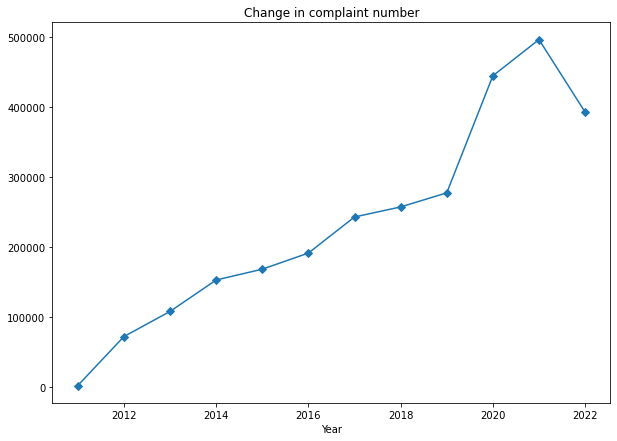

In [7]:
# Let's have a look at the changes in complaint numbers from 2012 to 2022. As indicated by the plot, complaint
# number is generally increasing, peaking in 2021 and starting to decrease.
fig, ax = plt.subplots(figsize = (10,7))
complaint['Date received'] = pd.to_datetime(complaint['Date received'])
complaint['Year'] = complaint['Date received'].dt.year
ax.set_title('Change in complaint number')
complaint.groupby('Year')['Complaint ID'].count().plot(marker = 'D')

<AxesSubplot:title={'center':'EQUIFAX INC Complaint Change'}, xlabel='Year'>

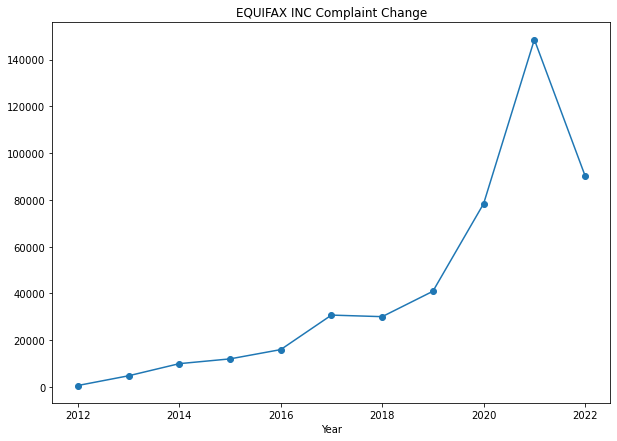

In [8]:
# Now let's look at company EQUIFAX INC, which has the most complaint cases. As indicated by the plot, the company's
# complaint pattern is aligned with industry trend, but its complaint number increased faster, starting from 2019. 
# There was also a rapid decrease in complaint number from 2021 to 2022.

fig, ax = plt.subplots(figsize = (10,7))
df = complaint[complaint['Company'] == 'EQUIFAX, INC.'] 
ax.set_title('EQUIFAX INC Complaint Change')
df.groupby('Year')['Complaint ID'].count().plot(marker = 'o')


<AxesSubplot:title={'center':'Industry Complained Product'}, ylabel='Product'>

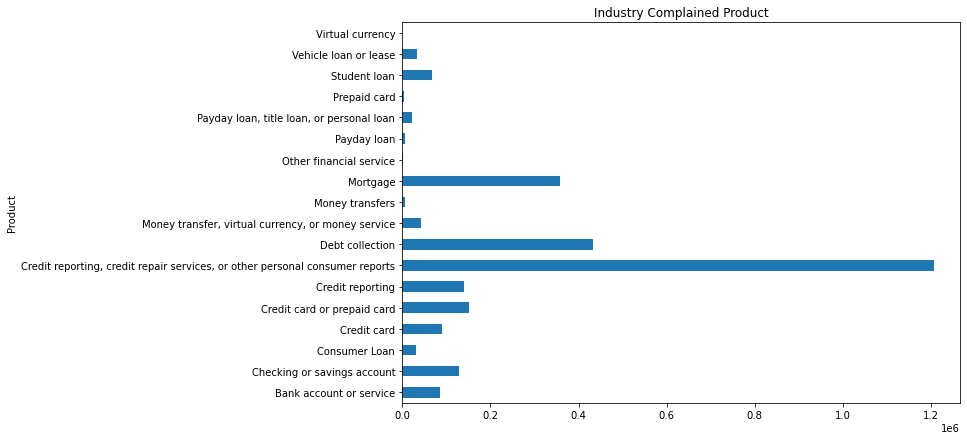

In [9]:
# Among all companies, credit reporting and related reporting products are most complained about by consumers.
fig, ax = plt.subplots(figsize = (10,7))
ax.set_title('Industry Complained Product')
complaint.groupby('Product')['Complaint ID'].count().plot.barh()

<AxesSubplot:title={'center':'EQUIFAX INC Complained Product'}, ylabel='Product'>

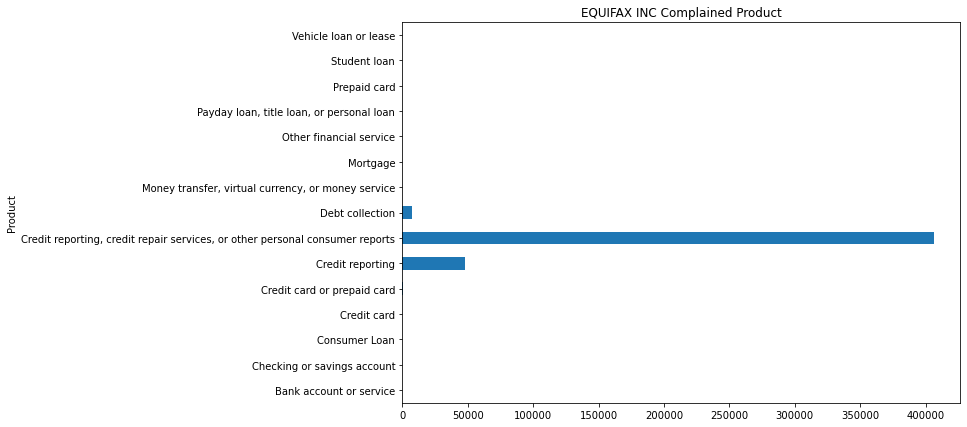

In [10]:
# EQUIFAX INC's most complained product is also credit reporting. However, considering that the company only has
# three products and its high complaint cases, EQUIFAX INC is facing serious problems with their credit reporting product.
fig, ax = plt.subplots(figsize = (10,7))
ax.set_title('EQUIFAX INC Complained Product')
df.groupby('Product')['Complaint ID'].count().plot.barh()

<AxesSubplot:ylabel='Issue'>

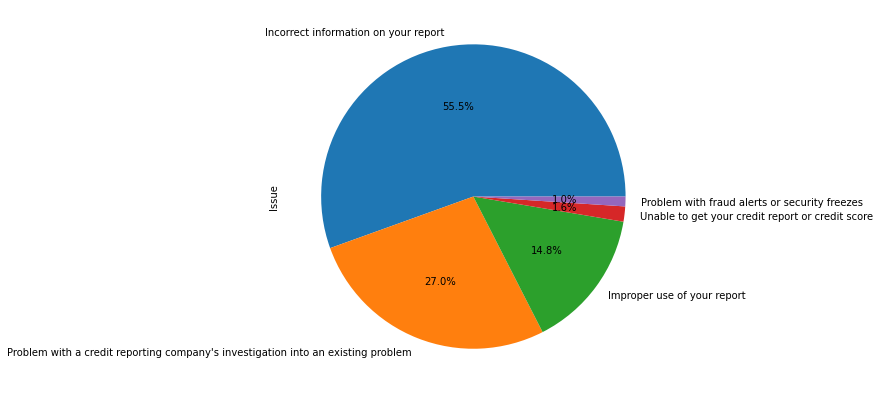

In [11]:
# Now let's look at the top 5 issues consumers are complaining about the credit reporting product.
fig, ax = plt.subplots(figsize = (10,7))
df2 = complaint[complaint['Product'] == 'Credit reporting, credit repair services, or other personal consumer reports'] 
df2['Issue'].value_counts().head(5).plot.pie(autopct = '%1.1f%%')

In [12]:
# Let's have a look at if complaints are related to the area where companies are located.
# First, let's create a new dataframe for the number of complaints of each state.
case = pd.DataFrame(complaint.groupby('State').size()).reset_index()
case.columns = ['State','size']
case.head()

,State,size
0,AA,48
1,AE,808
2,AK,2574
3,AL,50332
4,AP,564


In [13]:
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)

In [14]:
# Now let's create a geographical plot to show the number of complaints for each state.
# As indiacted by the graph, top three states with most complaints are CA, FL, and TX. Complaint number seems
# to be related to the states where companies are located.

data = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
        locations = case['State'],
        locationmode = "USA-states",
        z = case['size'],
        text = case['State'],
        colorbar = {'title' : 'Number of cases reported'},
      )

layout = dict(title = 'USA Consumer Complaints',
              geo = dict(projection = {'type':'mercator'})
             )

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)


<function matplotlib.pyplot.show(close=None, block=None)>

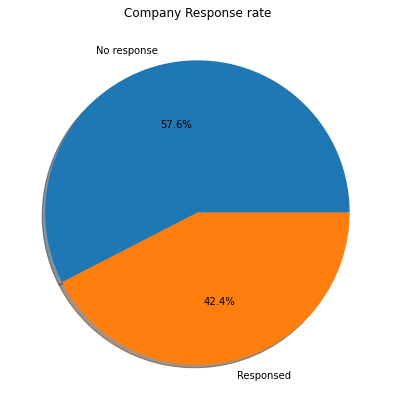

In [15]:
# Now let's have look at companies' reactions. How many cases receive a response?
# The chart shows that more tha half of the cases received a response from companies.
fig, ax = plt.subplots(figsize = (10,7))
x = complaint['Company public response'].isna().sum()
y = complaint['Company public response'].count().sum()
response = np.array([x,y])
my_labels = ['No response','Responsed']
plt.pie(response, labels = my_labels, autopct='%1.1f%%',shadow = True)
plt.title('Company Response rate')
plt.show

Text(0.5, 1.0, 'Company Response Types')

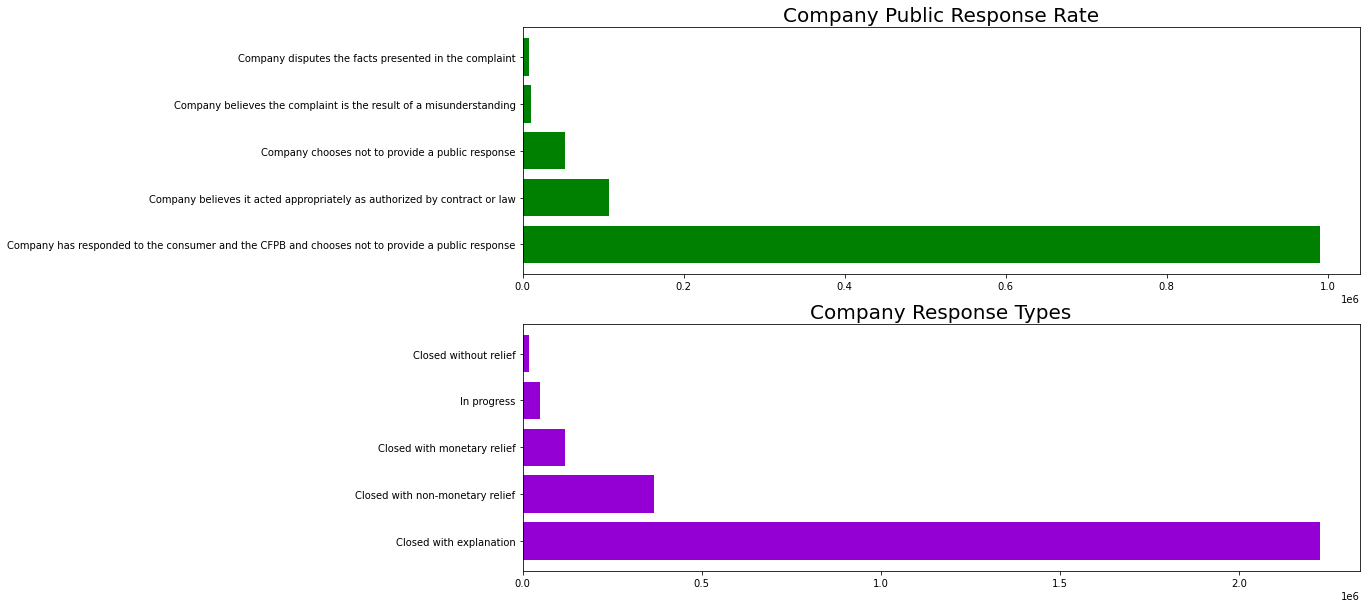

In [16]:
# As indicated by the chart, most companies which responsed tended to settle complaints privately with customers.
# Also, there are many cases where companies did not agree with the complaints and may even disputes the facts
# presented in the complaints.
fig, ax = plt.subplots(2,1,figsize = (15,10))
x = complaint['Company public response'].value_counts().head().index
y = complaint['Company public response'].value_counts().head().values
ax[0].barh(x,y, color = 'g')
ax[0].set_title('Company Public Response Rate',fontsize = 20)

x1= complaint['Company response to consumer'].value_counts().head().index
y1 = complaint['Company response to consumer'].value_counts().head().values
ax[1].barh(x1,y1, color = 'darkviolet')
ax[1].set_title('Company Response Types',fontsize = 20)


# The second chart indicates that most companies were able to close the complaint with explanation without making
# the response public. Most companies that were not able to provide an explanation also managed to close the complaints
# by offering different kinds of relief. There was only a very small number of companies that did not even offer 
# relief but closed the complaints.

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

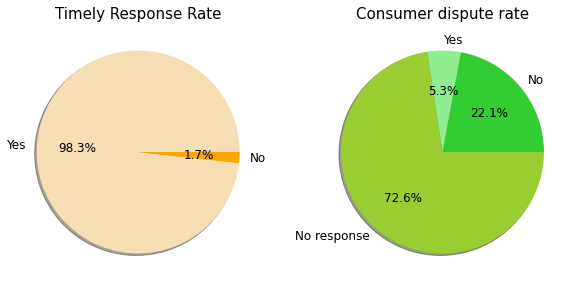

In [17]:
# Let's further look at if companies responsed timely and if consumers disputed.
# As indicated by the charts, nearly all companies provided timely response to complaints, and only a very small
# number of consumers chose to dispute against the companies, although there is a high non-response rate.

fig, ax = plt.subplots(1,2, figsize = (10,7))

ax[0].pie(complaint['Timely response?'].value_counts(), labels = complaint['Timely response?'].value_counts().index,
         autopct = '%1.1f%%', shadow = True, colors = ['wheat','orange'],textprops = {'fontsize':12})
ax[0].set_title('Timely Response Rate', fontsize = 15)

x2 = complaint['Consumer disputed?'].isna().sum()
y2 = complaint['Consumer disputed?'].value_counts().values
z = np.append(y2,x2)
my_label = ['No','Yes','No response']
ax[1].pie(z, labels = my_label, autopct = '%1.1f%%',textprops = {'fontsize':12}, 
          colors = ['limegreen','lightgreen','yellowgreen'],shadow = True)
ax[1].set_title('Consumer dispute rate', fontsize = 15)
plt.tight_layout

Text(0.5, 1.0, 'EQUIFAX INC. Consumer dispute rate')

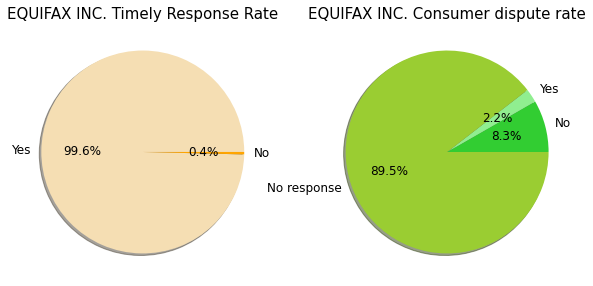

In [18]:
# Let's look at the response rate and consumer dispute rate of EQUIFAX, INC, which has the most complaint.
# The charts indicate that EUIFAX INC. has a similar timely response rate to the industry. However, consumers are
# more likely to not response, and there seem to be more dispute cases given the company's low no-dispute proportion.
fig, ax = plt.subplots(1,2, figsize = (10,7))
x = complaint[complaint['Company'] == 'EQUIFAX, INC.']['Timely response?'].value_counts()
ax[0].pie(x,labels = complaint[complaint['Company'] == 'EQUIFAX, INC.']['Timely response?'].value_counts().index,
         autopct = '%1.1f%%', shadow = True, colors = ['wheat','orange'],textprops = {'fontsize':12})
ax[0].set_title('EQUIFAX INC. Timely Response Rate', fontsize = 15)

x2 = complaint[complaint['Company'] == 'EQUIFAX, INC.']['Consumer disputed?'].isna().sum()
y2 = complaint[complaint['Company'] == 'EQUIFAX, INC.']['Consumer disputed?'].value_counts().values
z = np.append(y2,x2)
my_label = ['No','Yes','No response']
ax[1].pie(z, labels = my_label, autopct = '%1.1f%%',textprops = {'fontsize':12}, 
          colors = ['limegreen','lightgreen','yellowgreen'], shadow = True)
ax[1].set_title('EQUIFAX INC. Consumer dispute rate', fontsize = 15)

Text(0.5, 1.0, 'EQUIFAX INC. Non-timely response Issues')

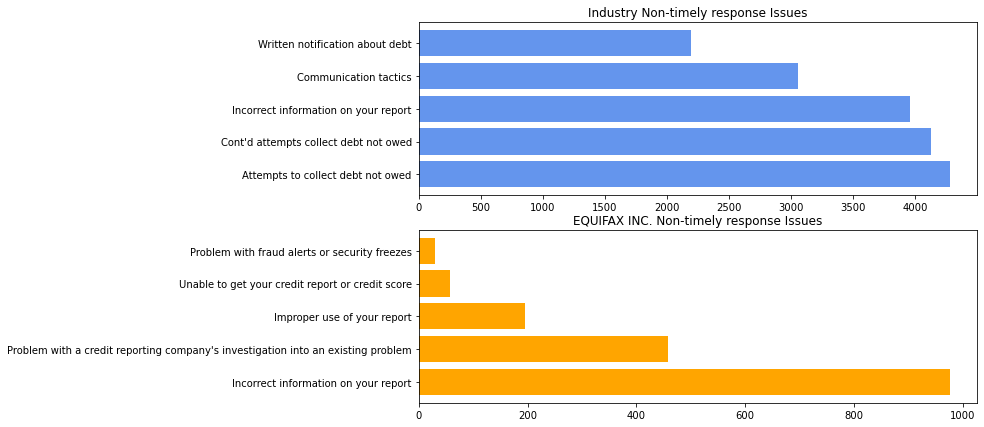

In [19]:
# Looking into the tiny proportion of Non-timely responses, the chart indicates that for the whole industry, issues 
# with debt are top reasons. However, for EQUIFAX INC, things are very different. The chart indicates that issues
# with reporting are the main reasons for the company's non-timely responses.

fig, ax = plt.subplots(2,1,figsize = (10,7))
x1 = complaint[complaint['Timely response?'] == 'No']['Issue'].value_counts().head().index
y1 = complaint[complaint['Timely response?'] == 'No']['Issue'].value_counts().head().values
x2 = complaint[(complaint['Timely response?'] == 'No') & (complaint['Company'] == 'EQUIFAX, INC.')]['Issue'].value_counts().head().index
y2 = complaint[(complaint['Timely response?'] == 'No') & (complaint['Company'] == 'EQUIFAX, INC.')]['Issue'].value_counts().head().values
ax[0].barh(x1,y1, color = 'cornflowerblue')
ax[1].barh(x2,y2,color = 'orange')
ax[0].set_title('Industry Non-timely response Issues')
ax[1].set_title('EQUIFAX INC. Non-timely response Issues')


In [20]:
# Finally, let's try to build a logistic regression model for predicting if companies will provide a timely response
# to a complaint.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [21]:
# Let's transformed the dataset to exclude unwanted columns and fill Nan values.
# Notice that I have to delete a few more columns, or the notebook will crash when I try to transform them into dummy values.
complaint = complaint.drop(['Date received','ZIP code','Date sent to company','Complaint ID','Consumer complaint narrative'
                           ,'Company',],axis = 1)
complaint['Consumer disputed?'] = complaint['Consumer disputed?'].map({'Yes': 'Y', 'No': 'N'})
complaint = complaint.fillna('missing')
complaint.head()

,Product,Sub-product,Issue,Sub-issue,Company public response,State,Tags,Consumer consent provided?,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Year
0,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,missing,OH,Servicemember,missing,Web,In progress,Yes,missing,2022
1,Credit card or prepaid card,General-purpose credit card or charge card,Fees or interest,Problem with fees,missing,IN,missing,missing,Web,Closed with monetary relief,Yes,missing,2022
2,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,missing,FL,missing,missing,Web,In progress,Yes,missing,2022
3,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,missing,AZ,missing,missing,Web,In progress,Yes,missing,2022
4,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,Company has responded to the consumer and the ...,DE,missing,Consent not provided,Web,Closed with non-monetary relief,Yes,missing,2022


In [22]:
# The notebook also crashes when i tried to include all get_dummies statements in one cell, 
# so I have to make them seperated
Products = pd.get_dummies(complaint['Product'],drop_first = True)
Sub_products = pd.get_dummies(complaint['Sub-product'],drop_first = True)
Issues = pd.get_dummies(complaint['Issue'],drop_first = True)

In [23]:
Sub_issues = pd.get_dummies(complaint['Sub-issue'],drop_first = True)

In [24]:
Company_public_response= pd.get_dummies(complaint['Company public response'],drop_first = True)

In [25]:
States = pd.get_dummies(complaint['State'],drop_first = True)

In [26]:
Tag = pd.get_dummies(complaint['Tags'],drop_first = True)

In [27]:
Consumer_consent_provided = pd.get_dummies(complaint['Consumer consent provided?'],drop_first = True)

In [28]:
Submitted_via = pd.get_dummies(complaint['Submitted via'],drop_first = True)

In [29]:
Company_response_to_consumer = pd.get_dummies(complaint['Company response to consumer'],drop_first = True)

In [30]:
Timely_response = pd.get_dummies(complaint['Timely response?'],drop_first = True)

In [31]:
Consumer_disputed = pd.get_dummies(complaint['Consumer disputed?'],drop_first = True)

In [32]:
Years = pd.get_dummies(complaint['Year'],drop_first = True)

In [33]:
#
train = pd.concat([Products,Sub_products,Issues,Sub_issues,Company_public_response,
                  States,Tag,Consumer_consent_provided,Submitted_via,Company_response_to_consumer,
                  Timely_response,Consumer_disputed,Years],axis = 1)
train.head()

,Checking or savings account,Consumer Loan,Credit card,Credit card or prepaid card,Credit reporting,"Credit reporting, credit repair services, or other personal consumer reports",Debt collection,"Money transfer, virtual currency, or money service",Money transfers,Mortgage,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [34]:
x_train,x_test,y_train,y_test = train_test_split(train.drop('Yes',axis = 1),
                                                train['Yes'], test_size = 0.30,
                                                random_state = 101)
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)



/Users/luke.xu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/Users/luke.xu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [35]:
predictions = logmodel.predict(x_test)

/Users/luke.xu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



In [36]:
# As indicated by the classification report, the model has a very high precision and recall when predicting if a
# company will provide timely response to be 'Yes'. It can be concluded that almost all the companies that are predicted
# to provide a timely response will, actually, provide a timely response. However, the model yields low
# recall and f1-score for class 0, which is 'Not provide a timely response' in the project context. This is because
# the dataset is very unbalanced, with only less than 2% of 'No'. This may not be a big problem, as we expect that
# most financial companies will provide timely response to complaints in real life.


print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.19      0.32     14646
           1       0.99      1.00      0.99    827330

    accuracy                           0.99    841976
   macro avg       0.99      0.60      0.66    841976
weighted avg       0.99      0.99      0.98    841976



In [37]:
print(confusion_matrix(y_test,predictions))

[[  2796  11850]
 [     2 827328]]


In [47]:
#Let's look at another variable. I have excluded some records to keep only 'provided' and 'not provided' rows.
consent = complaint[(complaint['Consumer consent provided?']== 'Consent provided') | (complaint['Consumer consent provided?']== 'Consent not provided')]
consent.head()


,Product,Sub-product,Issue,Sub-issue,Company public response,State,Tags,Consumer consent provided?,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Year
4,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,Company has responded to the consumer and the ...,DE,missing,Consent not provided,Web,Closed with non-monetary relief,Yes,missing,2022
8,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,Company has responded to the consumer and the ...,FL,missing,Consent not provided,Web,Closed with explanation,Yes,missing,2022
10,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Investigation took more than 30 days,Company has responded to the consumer and the ...,NY,missing,Consent not provided,Web,Closed with non-monetary relief,Yes,missing,2022
11,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,missing,WA,missing,Consent not provided,Web,Closed with explanation,Yes,missing,2022
12,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,Company has responded to the consumer and the ...,LA,missing,Consent not provided,Web,Closed with non-monetary relief,Yes,missing,2022


In [53]:
consent_dummies = pd.get_dummies(data=consent,columns = ['Product','Sub-product','Issue','Sub-issue',
                                                        'Company public response','State','Tags',
                                                        'Consumer consent provided?','Submitted via',
                                                        'Company response to consumer','Timely response?',
                                                        'Consumer disputed?','Year'],drop_first = True)


In [54]:
consent_dummies.head()

,Product_Checking or savings account,Product_Consumer Loan,Product_Credit card,Product_Credit card or prepaid card,Product_Credit reporting,"Product_Credit reporting, credit repair services, or other personal consumer reports",Product_Debt collection,"Product_Money transfer, virtual currency, or money service",Product_Money transfers,Product_Mortgage,...,Timely response?_Yes,Consumer disputed?_Y,Consumer disputed?_missing,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022
4,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
8,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
10,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
11,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
12,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1


In [59]:
x_train,x_test,y_train,y_test = train_test_split(consent_dummies.drop('Consumer consent provided?_Consent provided',axis = 1),
                                                consent_dummies['Consumer consent provided?_Consent provided'], test_size = 0.30,
                                                random_state = 101)
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

/Users/luke.xu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [60]:
predictions = logmodel.predict(x_test)

In [61]:
# This time, the model seems successful. The precision, recall, and f1-score for both 0 and 1 are quite close.
# A precision of 0.64 for both 0 and 1 indicates that 64% of cases are correctly classified as 'Provided a consent'
# or 'Not provided a consent'. The recall and f1 score for both classes are also over 0.6, which indicates that
# the model performs fine.

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.64      0.60      0.62    284445
           1       0.64      0.67      0.65    298194

    accuracy                           0.64    582639
   macro avg       0.64      0.64      0.64    582639
weighted avg       0.64      0.64      0.64    582639



In [62]:
print(confusion_matrix(y_test,predictions))

[[171241 113204]
 [ 97912 200282]]
